In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data

Text(0.5, 1.0, 'histogram of grey values')

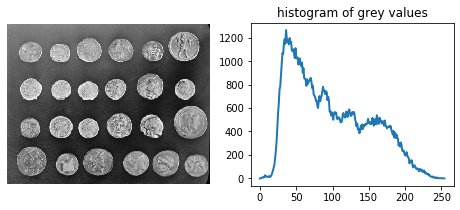

In [2]:
coins = data.coins()
hist = np.histogram(coins, bins=np.arange(0, 256))

plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(122)
plt.plot(hist[1][:-1], hist[0], lw=2)
plt.title('histogram of grey values')

Text(0.5, 1.0, 'elevation_map')

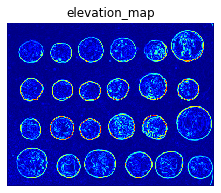

In [3]:
from skimage.filters import sobel

elevation_map = sobel(coins)

plt.figure(figsize=(4, 3))
plt.imshow(elevation_map, cmap=plt.cm.jet, interpolation='nearest')
plt.axis('off')
plt.title('elevation_map')

Text(0.5, 1.0, 'markers')

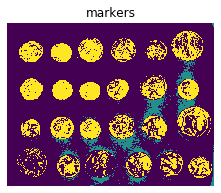

In [4]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

plt.figure(figsize=(4, 3))
plt.imshow(markers, cmap=plt.cm.viridis, interpolation='nearest')
plt.axis('off')
plt.title('markers')

Text(0.5, 1.0, 'segmentation')

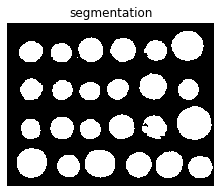

In [5]:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)

plt.figure(figsize=(4, 3))
plt.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('segmentation')

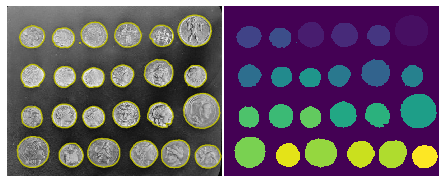

In [6]:
from scipy import ndimage

segmentation = ndimage.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndimage.label(segmentation)

plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
plt.contour(segmentation, [0.5], linewidths=1.2, colors='y')
plt.axis('off')
plt.subplot(122)
plt.imshow(labeled_coins, cmap=plt.cm.viridis, interpolation='nearest')
plt.axis('off')
margins = dict(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)
plt.subplots_adjust(**margins)